# This notebook describes the different peak classification parameters returned by 'identify_diad_peaks'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

g:\my drive\berkeley_new\diadfit_outer\src\DiadFit\cosmicray_filter.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


'0.0.51'

## Lets grab an example file to take a look at what these parameters mean

In [2]:
# Tweak parameters away from the default here
diad_id_config=pf.diad_id_config(height=1, prominence=50, width=0.5)
diad_id_config

diad_id_config(exclude_range1=None, exclude_range2=None, approx_diad2_pos=(1379, 1395), approx_diad1_pos=(1275, 1290), Diad2_window=(1349, 1425), Diad1_window=(1245, 1320), approx_diad2_pos_3peaks=(1379, 1395, 1362), height=1, width=0.5, prominence=50, plot_figure=True)

,filename,Diad2_HB2_prom_ratio,Diad1_HB1_prom_ratio,Diad2_pos,Diad2_prom,Diad1_pos,Diad1_prom,HB2_pos,HB2_prom,HB1_pos,...,HB1_height,Diad1_HB1_Valley_prom,Diad1_Median_Bck,Diad2_Median_Bck,approx_split,C13_HB2_prom_ratio,Mean_Diad_HB_Valley_prom,Mean_HB_prom,Diad2_prom/std_betweendiads,Left_vs_Right
3,POC30.txt,13.265143,14.034538,1388.814138,3628.190449,1285.708807,2034.327442,1410.078581,273.513112,1265.555152,...,860.951512,1.000919,720.333343,718.5,103.105331,6.300355,1.00787,418.464624,1460.682715,1.005147


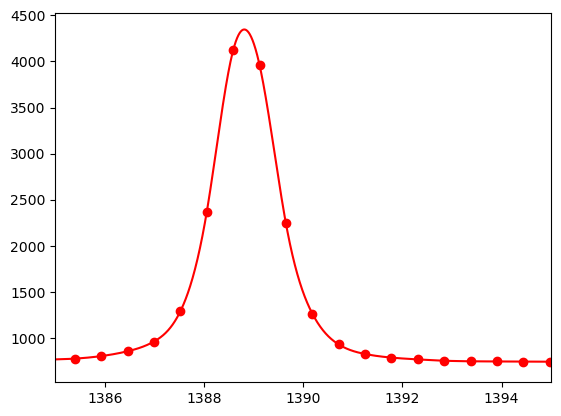

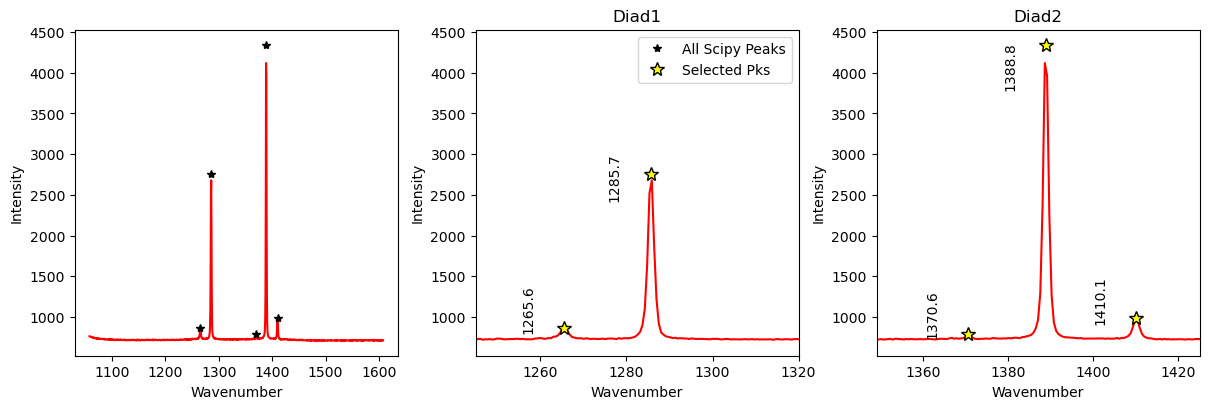

In [4]:
# Check it has found the peaks of interest. Here we are looking at the 1st file
import os
spectra_path=os.getcwd()
filetype='headless_txt'
df_peaks, Diad, fig=pf.identify_diad_peaks(
config=diad_id_config, 
path=spectra_path, filename='POC30.txt',
filetype=filetype, plot_figure=True)
df_peaks

## Lets get the actual data

In [8]:
Diad = np.array(pf.get_data(path=spectra_path, filename='POC30.txt', filetype='headless_txt'))
Diad_x=Diad[:, 0]
Diad_y=Diad[:, 1]

In [9]:
df_peaks.columns

Index(['filename', 'Diad2_HB2_prom_ratio', 'Diad1_HB1_prom_ratio', 'Diad2_pos',
       'Diad2_prom', 'Diad1_pos', 'Diad1_prom', 'HB2_pos', 'HB2_prom',
       'HB1_pos', 'HB1_prom', 'C13_pos', 'C13_prom',
       'Diad1_prom/std_betweendiads', 'Diad2_height', 'HB2_height',
       'Diad2_HB2_Valley_prom', 'C13_height', 'Diad1_height', 'HB1_height',
       'Diad1_HB1_Valley_prom', 'Diad1_Median_Bck', 'Diad2_Median_Bck',
       'approx_split', 'C13_HB2_prom_ratio', 'Mean_Diad_HB_Valley_prom',
       'Mean_HB_prom', 'Diad2_prom/std_betweendiads', 'Left_vs_Right'],
      dtype='object')

In [10]:
## Diad2_HB2_prom_ratio
- This parameter 

SyntaxError: invalid syntax (2892104511.py, line 2)

In [ ]:
## Diad1_HB1_prom_ratio	
- This parameter

## Diad2_pos, Diad1_pos
- This is the approximate position of Diad2 and Diad1
- We have fitted a cubic spline to your data, so its not the exact position after peak fitting, but instead an approximation.

## HB1_pos, HB2_Pos
- This is the approximate position of HB1 and HB2 after fitting the cubic spline

## Diad2_abs_prom, Diad1_abs_prom
- To characterize the prominence, we calculate the median intensity in two windows either side of each diad.
- We then subtract away the average of the median value of 2 background positions either side of the diad (yellow and blue here)

Text(0.02, 0.8, 'Diad2_abs_prom =2754.7-718.5')

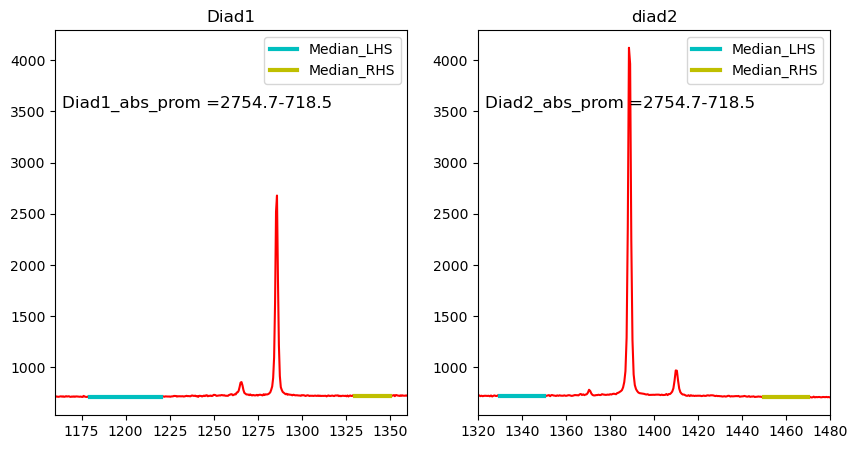

In [40]:
Med_LHS_diad1=np.nanmedian(Diad_y[(Diad[:, 0]>1180)& (Diad[:, 0]<1220)])
Med_RHS_diad1=np.nanmedian(Diad_y[(Diad[:, 0]>1330)& (Diad[:, 0]<1350)])
Med_bck_diad1=(Med_LHS_diad1+Med_RHS_diad1)/2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.set_title('Diad1')
ax1.plot(Diad[:, 0], Diad[:, 1], '-r')
ax1.plot([1180, 1220], [Med_LHS_diad1, Med_LHS_diad1], '-c', label='Median_LHS', lw=3)
ax1.plot([1330, 1350], [Med_RHS_diad1, Med_RHS_diad1], '-y', label='Median_RHS', lw=3)
ax1.legend()
ax1.set_xlim([1160, 1360])

Med_LHS_diad2=np.nanmedian(Diad_y[(Diad[:, 0]>1330)& (Diad[:, 0]<1350)])
Med_RHS_diad2=np.nanmedian(Diad_y[(Diad[:, 0]>1450)& (Diad[:, 0]<1470)])
Med_bck_diad2=(Med_RHS_diad2+Med_LHS_diad2)/2

ax2.set_title('diad2')
ax2.plot(Diad[:, 0], Diad[:, 1], '-r')
ax2.plot([1330, 1350], [Med_LHS_diad2, Med_LHS_diad2], '-c', label='Median_LHS', lw=3)
ax2.plot([1450, 1470], [Med_RHS_diad2, Med_RHS_diad2], '-y', label='Median_RHS', lw=3)
ax2.legend()
ax2.set_xlim([1320, 1480])

ax1.annotate("Diad1_abs_prom =" + str(np.round(df_peaks['Diad1_height'].iloc[0], 1)) + '-' +str(np.round(Med_bck_diad2, 1))  
             , xy=(0.02, 0.8), xycoords="axes fraction", fontsize=12)

ax2.annotate("Diad2_abs_prom =" + str(np.round(df_peaks['Diad1_height'].iloc[0], 1)) + '-' +str(np.round(Med_bck_diad2, 1))  
             , xy=(0.02, 0.8), xycoords="axes fraction", fontsize=12)


##  Diad2_ratio_prom, Diad1_ratio_prom
- We also define Diad2_ratio_prom and Diad1_ratio_prom, which is the peak height divided by this mean background position (Rather than subtracting them). 

In [ ]:
## HB2_abs_prom, HB1_abs_prom
- These are defined by taking the height of the hotband, 

## Diad2_HB2_prom_ratio, Diad1_HB1_prom_ratio

In [ ]:
Med_LHS_diad2=np.nanmedian(Diad_y[(Diad[:, 0]>1330)& (Diad[:, 0]<1350)])
Med_RHS_diad2=np.nanmedian(Diad_y[(Diad[:, 0]>1450)& (Diad[:, 0]<1470)])

In [ ]:
'filename', 'Diad2_HB2_prom_ratio', 'Diad1_HB1_prom_ratio', 'Diad2_pos',
       'Diad2_prom', 'Diad1_pos', 'Diad1_prom', 'HB2_pos', 'HB2_prom',
       'HB1_pos', 'HB1_prom', 'C13_pos', 'C13_prom',
       'Diad1_prom/std_betweendiads', 'Diad2_height', 'HB2_height',
       'Diad2_HB2_Valley_prom', 'C13_height', 'Diad1_height', 'HB1_height',
       'Diad1_HB1_Valley_prom', 'Diad1_Median_Bck', 'Diad2_Median_Bck',
       'approx_split', 'C13_HB2_prom_ratio', 'Mean_Diad_HB_Valley_prom',
       'Mean_HB_prom', 'Diad2_prom/std_betweendiads', 'Left_vs_Right'